# SCRAPING REVIEW DATA FOR BRITISH AIRWAY

In [1]:
# import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

#import library for sentiment analysis
from textblob import TextBlob

In [2]:
pages = 20
page_size = 100

reviews = []
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Collect HTML data from this page
    response = requests.get(url)
    
    #parse content
    soup = BeautifulSoup(response.content, 'html.parser') 
    for s in soup.find_all("div", {"class": "text_content"}):
        reviews.append(s.get_text())
        
        print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1 total reviews
   ---> 2 total reviews
   ---> 3 total reviews
   ---> 4 total reviews
   ---> 5 total reviews
   ---> 6 total reviews
   ---> 7 total reviews
   ---> 8 total reviews
   ---> 9 total reviews
   ---> 10 total reviews
   ---> 11 total reviews
   ---> 12 total reviews
   ---> 13 total reviews
   ---> 14 total reviews
   ---> 15 total reviews
   ---> 16 total reviews
   ---> 17 total reviews
   ---> 18 total reviews
   ---> 19 total reviews
   ---> 20 total reviews
   ---> 21 total reviews
   ---> 22 total reviews
   ---> 23 total reviews
   ---> 24 total reviews
   ---> 25 total reviews
   ---> 26 total reviews
   ---> 27 total reviews
   ---> 28 total reviews
   ---> 29 total reviews
   ---> 30 total reviews
   ---> 31 total reviews
   ---> 32 total reviews
   ---> 33 total reviews
   ---> 34 total reviews
   ---> 35 total reviews
   ---> 36 total reviews
   ---> 37 total reviews
   ---> 38 total reviews
   ---> 39 total reviews
   ---> 40 total r

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The flight schedule was dela...
1,✅ Trip Verified | The worst experience in all ...
2,✅ Trip Verified | The worst experience in all...
3,✅ Trip Verified | Terrible delays. Had to reb...
4,✅ Trip Verified | A serious medical problem a...


In [4]:
# Save to csv file
df.to_csv("Downloads/BA_reviews.csv")

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [6]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '', regex=True)
df['reviews'] = df['reviews'].str.replace('Not Verified |', '', regex=True)
df['reviews'] = df['reviews'].str.replace('✅ Verified Review', '', regex=True)
df['reviews'] = df['reviews'].str.replace('\r\nI', '', regex=True)


In [7]:
df['reviews'] = df['reviews'].str.replace('|', '', regex=True)


In [8]:
df.head()

,reviews
0,The flight schedule was delayed for one hour....
1,The worst experience in all my years of trave...
2,The worst experience in all my years of trav...
3,Terrible delays. Had to rebook our domestic ...
4,A serious medical problem appeared while I w...


In [9]:
# checking for null values
df.isna().sum()

reviews    0
dtype: int64

In [10]:
#getting polarity_score
polarity_score = []
for i in range(0,df.shape[0]):
    score = TextBlob(df.iloc[i][0])
    score1 = score.sentiment[0]
    polarity_score.append(score1)
    
#concatenating the score with thw dataframe
df = pd.concat([df,pd.Series(polarity_score)] , axis = 1)



In [11]:
df.head()

,reviews,0
0,The flight schedule was delayed for one hour....,-0.215714
1,The worst experience in all my years of trave...,-0.083333
2,The worst experience in all my years of trav...,-0.460000
3,Terrible delays. Had to rebook our domestic ...,-0.215909
4,A serious medical problem appeared while I w...,-0.092593


In [12]:
# rename columns
df.rename(columns={df.columns[1]: "Sentiment"}, inplace = True)

df.head()

,reviews,Sentiment
0,The flight schedule was delayed for one hour....,-0.215714
1,The worst experience in all my years of trave...,-0.083333
2,The worst experience in all my years of trav...,-0.460000
3,Terrible delays. Had to rebook our domestic ...,-0.215909
4,A serious medical problem appeared while I w...,-0.092593


In [13]:
#positive
print(len(df[df.Sentiment > 0]))
#negative
print(len(df[df.Sentiment < 0]))
#neutral
print(len(df[df.Sentiment == 0]))

1327
663
10


In [14]:
len(df[df.Sentiment > 0])

1327

In [15]:
#creating a new column to label the sentiment
filters = [
   (df.Sentiment > 0) ,
   (df.Sentiment < 0) ,
   (df.Sentiment == 0)
]
values = ["Positive", "Negative", "Neutral"]

df["status"] = np.select(filters, values)
df.tail()

,reviews,Sentiment,status
1995,Early morning flight London Heathrow to Glas...,0.292873,Positive
1996,Flew British Airways from Phoenix to London He...,-0.031944,Negative
1997,Lisbon to Heathrow on British Airways. I bo...,0.115942,Positive
1998,Gatwick to Marrakech with my family for a 7...,0.074621,Positive
1999,Flew British Airways from Barcelona to London ...,0.261250,Positive


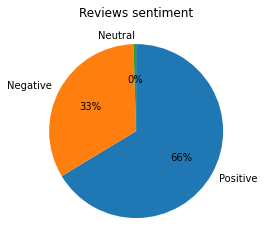

In [16]:
count = df['status'].value_counts()
#Using matplotlib donught chart
plt.pie(count, labels = count.index,autopct='%.0f%%',startangle = 90,
        counterclock = False);
plt.title('Reviews sentiment');

In [17]:
#Import wordcloud library
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

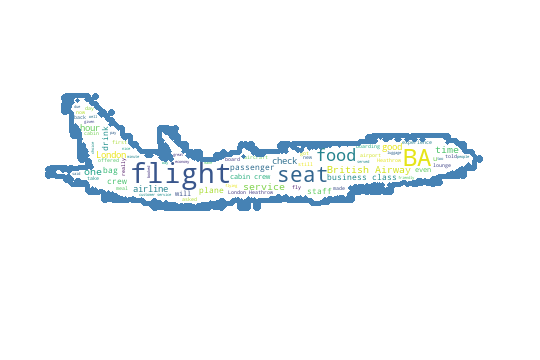

In [19]:
long_string = ','.join(list(df['reviews'].values))
custom_mask = np.array(Image.open('downloads/planee.jpg'))
# Create a WordCloud object
wc = WordCloud(background_color="white", max_words=1000, contour_width=5, contour_color='steelblue', mask= custom_mask)
# Generate a word cloud
wc.generate(long_string)
# Visualize the word cloud
wc.to_image()

In [27]:
df_pos = df[df.status== 'Positive']
df_neg = df[df.status== 'Negative']

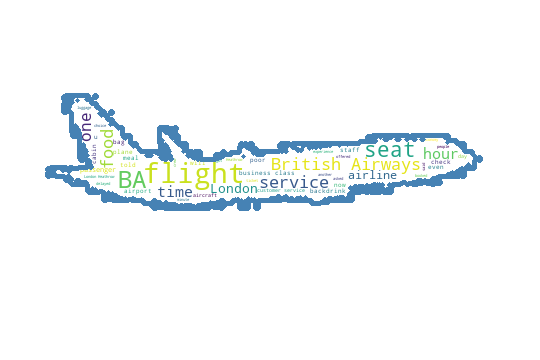

In [32]:
#wordcloud for negative sentiments
long_string = ','.join(list(df_neg['reviews'].values))
custom_mask = np.array(Image.open('downloads/planee.jpg'))
# Create a WordCloud object
wc1 = WordCloud(background_color="white", max_words=1000, contour_width=5, contour_color='steelblue', mask= custom_mask)
# Generate a word cloud
wc1.generate(long_string)
# Visualize the word cloud
wc1.to_image()

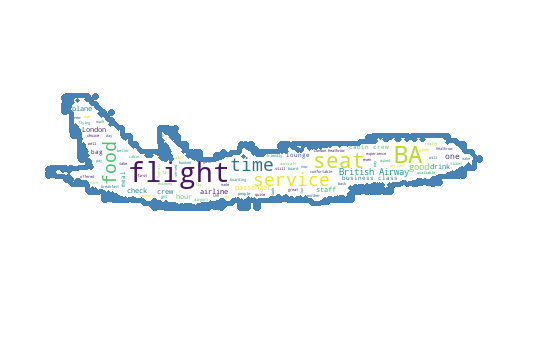

In [33]:
#wordcloud for positive sentiments
long_string = ','.join(list(df_pos['reviews'].values))
custom_mask = np.array(Image.open('downloads/planee.jpg'))
# Create a WordCloud object
wc2 = WordCloud(background_color="white", max_words=1000, contour_width=5, contour_color='steelblue', mask= custom_mask)
# Generate a word cloud
wc2.generate(long_string)
# Visualize the word cloud
wc2.to_image()

In [35]:
# Convert to a file
wc.to_file('downloads/aeroplane.png')
# Convert to a file
wc1.to_file('downloads/aeroplane1.png')
# Convert to a file
wc2.to_file('downloads/aeroplane2.png')